In [142]:
import pandas as pd
from faker import Faker

# Loading file

In [176]:
df = pd.read_csv('data/Churn_Modelling.csv')

In [177]:
pd.options.display.float_format = '{:.2f}'.format

In [178]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Clean Data

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [180]:
df[df.isnull().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [181]:
df.drop('RowNumber', axis=1, inplace=True)

In [182]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [183]:
df['Gender'] = df['Gender'].apply(lambda x:'Masculino' if x == "Male" else "Feminino")
df['Geography'] = df['Geography'].apply(lambda x:'França' if x == "France" else x )
df['Geography'] = df['Geography'].apply(lambda x:'Espanha' if x == "Spain" else x)
df['Geography'] = df['Geography'].apply(lambda x:'Alemanha' if x == "Germany" else x)

In [184]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,França,Feminino,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Espanha,Feminino,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,França,Feminino,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,França,Feminino,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Espanha,Feminino,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,França,Masculino,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,França,Masculino,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,França,Feminino,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Alemanha,Masculino,42,3,75075.31,2,1,0,92888.52,1


# Count Country by Gender

In [185]:
count_customer_country = df.groupby(['Geography', 'Gender'])['CustomerId'].count()

In [186]:
count_customer_country

Geography  Gender   
Alemanha   Feminino     1193
           Masculino    1316
Espanha    Feminino     1089
           Masculino    1388
França     Feminino     2261
           Masculino    2753
Name: CustomerId, dtype: int64

# Change Surname to Fakers 

In [187]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,França,Feminino,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Espanha,Feminino,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,França,Feminino,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,França,Feminino,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Espanha,Feminino,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,França,Masculino,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,França,Masculino,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,França,Feminino,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Alemanha,Masculino,42,3,75075.31,2,1,0,92888.52,1


In [188]:
def make_name_male(idioma, count):
    names_male = []
    fake = Faker(idioma)
    for _ in range (0,count):
        names_male.append(fake.name_male())
    return names_male

def make_name_female(idioma,count):
    names_female = []
    fake = Faker(idioma)
    for _ in range (0,count):
        names_female.append(fake.name_female())
    return names_female

In [189]:
names_male_france = make_name_male('fr_FR',2753 )
names_female_france = make_name_female('fr_FR',2261)

names_male_germany = make_name_male('de_DE',1316 )
names_female_germany = make_name_female('de_DE', 1193)

names_male_spain = make_name_male('es_ES',1388 )
names_female_spain = make_name_female('es_ES', 1089)

In [191]:
# Substituir os nomes para Male/Female em França
df.loc[(df['Gender'] == "Masculino") & (df['Geography'] == "França"), 'Surname'] = names_male_france
df.loc[(df['Gender'] == "Feminino") & (df['Geography'] == "França"), 'Surname'] = names_female_france

# Substituir os nomes para Masculino/Feminino em Germany
df.loc[(df['Gender'] == "Masculino") & (df['Geography'] == "Alemanha"), 'Surname'] = names_male_germany
df.loc[(df['Gender'] == "Feminino") & (df['Geography'] == "Alemanha"), 'Surname'] = names_female_germany

# Substituir os nomes para Masculino/Feminino em Espanha
df.loc[(df['Gender'] == "Masculino") & (df['Geography'] == "Espanha"), 'Surname'] = names_male_spain
df.loc[(df['Gender'] == "Feminino") & (df['Geography'] == "Espanha"), 'Surname'] = names_female_spain


In [192]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Danielle Fernandes-Diallo,619,França,Feminino,42,2,0.00,1,1,1,101348.88,1
1,15647311,Adelia Uribe Prat,608,Espanha,Feminino,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Claude Leclercq,502,França,Feminino,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Frédérique Bouvet de la Lejeune,699,França,Feminino,39,1,0.00,2,0,0,93826.63,0
4,15737888,Virginia de Fabra,850,Espanha,Feminino,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Antoine Aubry,771,França,Masculino,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Alain Blanchard,516,França,Masculino,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Astrid Jacquet,709,França,Feminino,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Attila Hesse,772,Alemanha,Masculino,42,3,75075.31,2,1,0,92888.52,1


# Count by Gênero 

In [193]:
count_customer_gender = df.groupby('Gender')['CustomerId'].count()

In [194]:
count_customer_gender

Gender
Feminino     4543
Masculino    5457
Name: CustomerId, dtype: int64

# Age vs Products

In [195]:
age_product = df.groupby('Age')[['NumOfProducts']].sum().reset_index()

<Axes: xlabel='Age'>

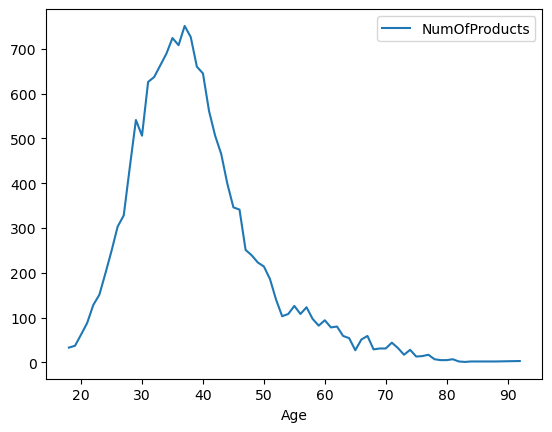

In [196]:
age_product.plot(x='Age', y='NumOfProducts')

# Age vs Score

In [197]:
age_score = df.groupby('Age')[['CreditScore']].mean().reset_index()

In [198]:
age_score

,Age,CreditScore
0,18,686.68
1,19,665.63
2,20,665.05
3,21,647.28
4,22,636.55
...,...,...
65,83,678.00
66,84,472.50
67,85,787.00
68,88,513.00


<Axes: xlabel='Age'>

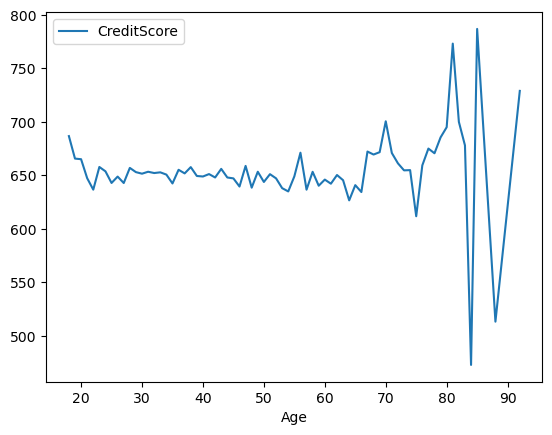

In [199]:
age_score.plot(x='Age', y='CreditScore')

# Total Customer

In [200]:
total_customer = df['CustomerId'].count()

In [201]:
total_customer

10000

# Total de Ativos no Banco

In [202]:
total_customer_active = df[df['IsActiveMember'] == 1]['CustomerId'].count()

In [203]:
total_customer_active

5151

# Percent HasCard

In [204]:
total_hasCard = df[(df['HasCrCard'] == 1)].count()

In [205]:
percen_hascard = round((total_hasCard/total_customer)*100)

In [206]:
percen_hascard['CustomerId']

71.0

# Top 10 Bests Scores

In [208]:
df[['Surname', 'Age', 'CreditScore']].sort_values(by=['CreditScore','Surname'], ascending=False).head(10).reset_index(drop=True)

,Surname,Age,CreditScore
0,Íñigo de Cortes,30,850
1,Émilie Langlois-Morvan,32,850
2,Élodie Masse,35,850
3,Édouard Rolland-Denis,32,850
4,Édouard Pruvost,55,850
5,Édouard Ledoux de la Blanchet,33,850
6,Zoraida Taboada Querol,45,850
7,Zaida Busquets Cruz,41,850
8,Yves Rey,28,850
9,Yves Ollivier,28,850


# Output

In [209]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Danielle Fernandes-Diallo,619,França,Feminino,42,2,0.00,1,1,1,101348.88,1
1,15647311,Adelia Uribe Prat,608,Espanha,Feminino,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Claude Leclercq,502,França,Feminino,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Frédérique Bouvet de la Lejeune,699,França,Feminino,39,1,0.00,2,0,0,93826.63,0
4,15737888,Virginia de Fabra,850,Espanha,Feminino,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Antoine Aubry,771,França,Masculino,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Alain Blanchard,516,França,Masculino,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Astrid Jacquet,709,França,Feminino,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Attila Hesse,772,Alemanha,Masculino,42,3,75075.31,2,1,0,92888.52,1


In [210]:
df.to_csv('data_cleaned.csv')